## PCA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

- Wine data 정규화

In [2]:
from sklearn.datasets import load_wine
wine = load_wine()
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['target'] = wine.target
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [3]:
from sklearn.preprocessing import StandardScaler
wine_std = StandardScaler().fit_transform(wine.data)
wine_std[:3]

array([[ 1.51861254, -0.5622498 ,  0.23205254, -1.16959318,  1.91390522,
         0.80899739,  1.03481896, -0.65956311,  1.22488398,  0.25171685,
         0.36217728,  1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, -2.49084714,  0.01814502,
         0.56864766,  0.73362894, -0.82071924, -0.54472099, -0.29332133,
         0.40605066,  1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, -0.2687382 ,  0.08835836,
         0.80899739,  1.21553297, -0.49840699,  2.13596773,  0.26901965,
         0.31830389,  0.78858745,  1.39514818]])

- PCA로 차원축소

In [4]:
# 2차원으로 축소
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
wine_pca = pca.fit_transform(wine_std)
wine_pca[:3]

array([[ 3.31675081, -1.44346263],
       [ 2.20946492,  0.33339289],
       [ 2.51674015, -1.0311513 ]])

In [5]:
pca.explained_variance_ratio_

array([0.36198848, 0.1920749 ])

In [6]:
# 4차원으로 축소
pca2 = PCA(n_components=4)
wine_pca2 = pca2.fit_transform(wine_std)
wine_pca2[:3]

array([[ 3.31675081, -1.44346263, -0.16573904, -0.21563119],
       [ 2.20946492,  0.33339289, -2.02645737, -0.29135832],
       [ 2.51674015, -1.0311513 ,  0.98281867,  0.72490231]])

In [7]:
pca2.explained_variance_ratio_, sum(pca2.explained_variance_ratio_)

(array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 ]), 0.735989990758993)

In [8]:
# 6차원으로 축소
pca3 = PCA(n_components=6)
wine_pca3 = pca3.fit_transform(wine_std)
wine_pca3[:3]

array([[ 3.31675081, -1.44346263, -0.16573904, -0.21563119,  0.69304284,
        -0.22388013],
       [ 2.20946492,  0.33339289, -2.02645737, -0.29135832, -0.25765463,
        -0.92712024],
       [ 2.51674015, -1.0311513 ,  0.98281867,  0.72490231, -0.25103312,
         0.54927605]])

In [9]:
pca3.explained_variance_ratio_, sum(pca3.explained_variance_ratio_)

(array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
        0.04935823]),
 0.8509811607477046)

- PCA 전후 비교

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [11]:
# 원본 데이터로 분류
X_train, X_test, y_train, y_test = train_test_split(
    wine.data, wine.target, stratify=wine.target, random_state=2021
)
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc.score(X_test, y_test)

1.0

In [12]:
# 2차원
X_train, X_test, y_train, y_test = train_test_split(
    wine_pca, wine.target, stratify=wine.target, random_state=2021
)
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc.score(X_test, y_test)

0.9111111111111111

In [13]:
# 4차원
X_train, X_test, y_train, y_test = train_test_split(
    wine_pca2, wine.target, stratify=wine.target, random_state=2021
)
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc.score(X_test, y_test)

0.9333333333333333

In [14]:
# 6차원
X_train, X_test, y_train, y_test = train_test_split(
    wine_pca3, wine.target, stratify=wine.target, random_state=2021
)
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc.score(X_test, y_test)

0.9333333333333333

- 2차원으로 차원축소한 것으로 시각화

In [15]:
df['PC1'] = wine_pca[:,0]
df['PC2'] = wine_pca[:,1]

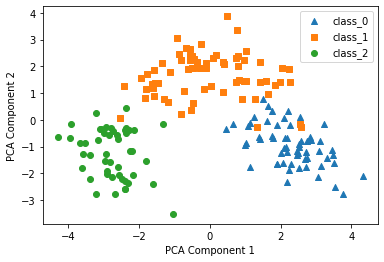

In [16]:
markers = ['^', 's', 'o']

for i, marker in enumerate(markers):
    x_data = df[df.target == i]['PC1']
    y_data = df[df.target == i]['PC2']
    plt.scatter(x_data, y_data, marker=marker,
                label=wine.target_names[i])
plt.legend()
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

- Code Refactoring

In [17]:
def pca_accuracy(X, y):
    X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, random_state=2021
    )
    rfc = RandomForestClassifier()
    rfc.fit(X_train, y_train)
    score = rfc.score(X_test, y_test)
    return score

In [18]:
for n in [2, 4, 6]:
    pca = PCA(n_components=n)
    wine_pca = pca.fit_transform(wine_std)
    explained = sum(pca.explained_variance_ratio_)
    acc = pca_accuracy(wine_pca, wine.target)
    print(f'PCA {n}차원의 설명력: {explained:.4f}, 정확도: {acc:.4f}')

PCA 2차원의 설명력: 0.5541, 정확도: 0.9111
PCA 4차원의 설명력: 0.7360, 정확도: 0.9556
PCA 6차원의 설명력: 0.8510, 정확도: 0.9556
